In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_translation = pd.read_csv('product_category_name_translation.csv')

In [2]:
# ------- 9 product_category_translation
print("\nproduct_category_translation")
product_category_translation.shape



product_category_translation


(71, 2)

In [3]:
product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
product_category_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [5]:
product_category_translation = product_category_translation.dropna()

In [6]:
product_category_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [7]:
# Create a dictionary for mapping from 'product_category_name' to 'product_category_name_english'
translation_map = dict(zip(product_category_translation.product_category_name, 
                           product_category_translation.product_category_name_english))

# a function to replace the 'product_category_name' in Portuguese to English
def replace_category_with_translation(df, translation_map):
    if 'product_category_name' in product_category_translation.columns:
        product_category_translation['product_category_name'].replace(
            translation_map, inplace=True)
    return product_category_translation

In [8]:
state_mapping = {
    'SP': 'São Paulo',
    'RN': 'Rio Grande do Norte',
    'AC': 'Acre',
    'RJ': 'Rio de Janeiro',
    'ES': 'Espírito Santo',
    'MG': 'Minas Gerais',
    'BA': 'Bahia',
    'SE': 'Sergipe',
    'PE': 'Pernambuco',
    'AL': 'Alagoas',
    'PB': 'Paraíba',
    'CE': 'Ceará',
    'PI': 'Piauí',
    'MA': 'Maranhão',
    'PA': 'Pará',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'RR': 'Roraima',
    'DF': 'Distrito Federal',
    'GO': 'Goiás',
    'RO': 'Rondônia',
    'TO': 'Tocantins',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina'
}


In [9]:
cities_mapping = {
    'franca': 'Franca',
    'sao bernardo do campo': 'São Bernardo do Campo',
    'sao paulo': 'São Paulo',
    'são paulo': 'São Paulo',
    'monte bonito': 'Monte Bonito',
    'sao rafael': 'São Rafael',
    'eugenio de castro': 'Eugenio de Castro',
    'ciríaco': 'Ciríaco',
    'estação': 'Estação',
    'vila lângaro': 'Vila Lângaro',
    '...arraial do cabo': 'Arraial do Cabo'
}

# There are more than 1000 of cities, we only able to change some cities that have the same name and some unkown symbol etc.

In [10]:
customers['customer_state'] = customers['customer_state'].replace(state_mapping)
sellers['seller_state'] = sellers['seller_state'].replace(state_mapping)
geolocation['geolocation_state'] = geolocation['geolocation_state'].replace(state_mapping)
geolocation['geolocation_city'] = geolocation['geolocation_city'].replace(cities_mapping)
customers['customer_city'] = customers['customer_city'].replace(cities_mapping)
sellers['seller_city'] = sellers['seller_city'].replace(cities_mapping)

In [11]:
# ------- 1 customers
print("\nCustomer")
# Check the shape of the dataframe
customers.shape


Customer


(99441, 5)

In [12]:
# View the first few rows of the dataframe
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,São Bernardo do Campo,São Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,São Paulo,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo


In [13]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [14]:
# Check for missing data
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
# Remove missing data
customers = customers.dropna()

In [16]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [17]:
customers.duplicated().sum()

0

In [18]:
# View descriptive statistics of the dataframe
customers.customer_id.describe()

count                                99441
unique                               99441
top       06b8999e2fba1a1fbc88172c00ba8bc7
freq                                     1
Name: customer_id, dtype: object

Text(0.5, 0, 'Number of Customers')

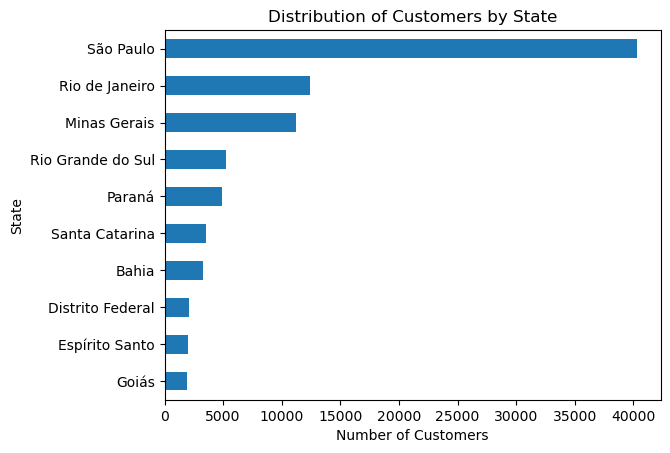

In [19]:
# to find the distribution of customers based on their state
customers.groupby(['customer_state'])['customer_unique_id'].nunique().sort_values(
    ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Customers by State")
plt.ylabel("State")
plt.xlabel("Number of Customers")

In [20]:
print(customers.customer_city.unique())

['Franca' 'São Bernardo do Campo' 'São Paulo' ... 'Monte Bonito'
 'São Rafael' 'Eugenio de Castro']


Text(0.5, 0, 'Number of Customers')

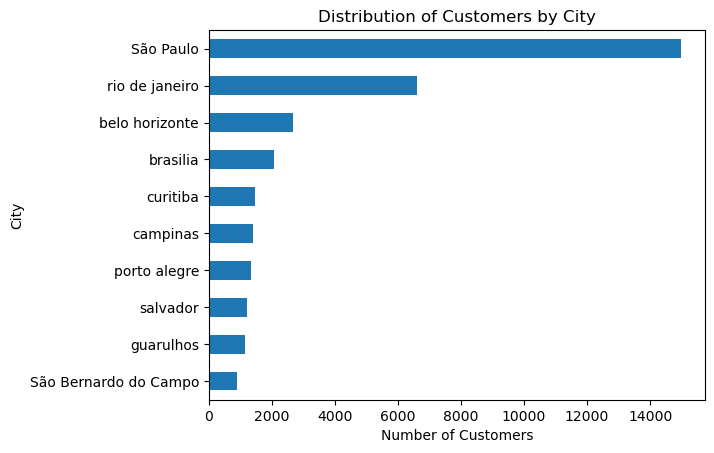

In [21]:
# to find the distribution of customers based on their city
customers.groupby(['customer_city'])['customer_unique_id'].nunique().sort_values(
    ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Customers by City")
plt.ylabel("City")
plt.xlabel("Number of Customers")

In [22]:
# ------- 2 geolocation
print("\nLocation")
geolocation.shape


Location


(1000163, 5)

In [23]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,São Paulo,São Paulo
1,1046,-23.546081,-46.644820,São Paulo,São Paulo
2,1046,-23.546129,-46.642951,São Paulo,São Paulo
3,1041,-23.544392,-46.639499,São Paulo,São Paulo
4,1035,-23.541578,-46.641607,São Paulo,São Paulo


In [24]:
geolocation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [25]:
geolocation.geolocation_state.unique()

array(['São Paulo', 'Rio Grande do Norte', 'Acre', 'Rio de Janeiro',
       'Espírito Santo', 'Minas Gerais', 'Bahia', 'Sergipe', 'Pernambuco',
       'Alagoas', 'Paraíba', 'Ceará', 'Piauí', 'Maranhão', 'Pará',
       'Amapá', 'Amazonas', 'Roraima', 'Distrito Federal', 'Goiás',
       'Rondônia', 'Tocantins', 'Mato Grosso', 'Mato Grosso do Sul',
       'Rio Grande do Sul', 'Paraná', 'Santa Catarina'], dtype=object)

In [26]:
geolocation.geolocation_city.unique()

array(['São Paulo', 'São Bernardo do Campo', 'jundiaí', ..., 'Ciríaco',
       'Estação', 'Vila Lângaro'], dtype=object)

In [27]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [28]:
geolocation = geolocation.dropna()

In [29]:
# finding number of redundant rows
geolocation.geolocation_zip_code_prefix.duplicated().sum()

981148

In [30]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [31]:
# finding number of redundant rows
geolocation.geolocation_lat.duplicated().sum()

282803

In [32]:
geolocation.geolocation_lng.duplicated().sum()

282550

In [33]:
# Filter rows that are duplicated based on 'geolocation_zip_code_prefix'
duplicate_rows = geolocation[geolocation.duplicated(subset='geolocation_zip_code_prefix', keep=False)]

# Print the duplicate rows
duplicate_rows

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,São Paulo,São Paulo
1,1046,-23.546081,-46.644820,São Paulo,São Paulo
2,1046,-23.546129,-46.642951,São Paulo,São Paulo
3,1041,-23.544392,-46.639499,São Paulo,São Paulo
4,1035,-23.541578,-46.641607,São Paulo,São Paulo
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,Rio Grande do Sul
1000159,99900,-27.877125,-52.224882,getulio vargas,Rio Grande do Sul
1000160,99950,-28.071855,-52.014716,tapejara,Rio Grande do Sul
1000161,99980,-28.388932,-51.846871,david canabarro,Rio Grande do Sul


In [34]:
# Calculate Q1, Q3, and IQR for latitude
Q1_lat = geolocation['geolocation_lat'].quantile(0.25)
Q3_lat = geolocation['geolocation_lat'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

# Define bounds
lower_bound_lat = Q1_lat - 1.5 * IQR_lat
upper_bound_lat = Q3_lat + 1.5 * IQR_lat

# Identify outliers
outliers_lat = geolocation[(geolocation['geolocation_lat'] < lower_bound_lat) | (geolocation['geolocation_lat'] 
                                                                                 > upper_bound_lat)]
outliers_lat


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
250816,11200,-8.275689,-35.965615,caruara,São Paulo
302630,13355,-12.993852,-38.480882,cardeal,São Paulo
304242,13375,-5.754127,-39.627933,mombuca,São Paulo
332933,14185,-14.414915,-42.874718,candia,São Paulo
333157,14185,-14.411892,-42.871632,candia,São Paulo
...,...,...,...,...,...
997877,99440,-29.089375,-53.223443,salto do jacui,Rio Grande do Sul
997883,99440,-29.087320,-53.216383,salto do jacui,Rio Grande do Sul
999082,99718,-30.855193,-51.800950,paulo bento,Rio Grande do Sul
999481,99870,-29.815148,-51.143162,sao jose do ouro,Rio Grande do Sul


In [35]:
# Calculate Q1, Q3, and IQR for longitude
Q1_lng = geolocation['geolocation_lng'].quantile(0.25)
Q3_lng = geolocation['geolocation_lng'].quantile(0.75)
IQR_lng = Q3_lng - Q1_lng

# Define bounds
lower_bound_lng = Q1_lng - 1.5 * IQR_lng
upper_bound_lng = Q3_lng + 1.5 * IQR_lng

# Identify outliers
outliers_lng = geolocation[(geolocation['geolocation_lng'] < lower_bound_lng) | (geolocation['geolocation_lng'] 
                                                                                 > upper_bound_lng)]
outliers_lng


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
250816,11200,-8.275689,-35.965615,caruara,São Paulo
387565,18243,28.008978,-15.536867,bom retiro da esperanca,São Paulo
399300,19274,-10.893066,-61.932123,primavera,São Paulo
502492,27165,-8.068203,-34.893333,sao jose do turvo,Rio de Janeiro
502745,27165,-15.640132,-56.041370,sao jose do turvo,Rio de Janeiro
...,...,...,...,...,...
996197,99010,-28.622892,-56.026167,passo fundo,Rio Grande do Sul
996198,99010,-28.623859,-56.028473,passo fundo,Rio Grande do Sul
996224,99010,-28.622810,-56.025688,passo fundo,Rio Grande do Sul
996249,99010,-28.622629,-56.025312,passo fundo,Rio Grande do Sul


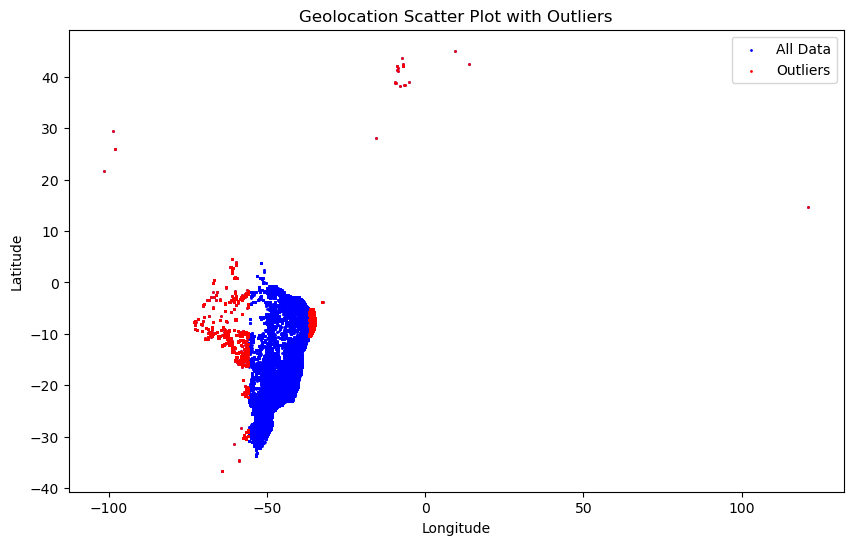

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], c='blue', s=1, label='All Data')
plt.scatter(outliers_lng['geolocation_lng'], outliers_lng['geolocation_lat'], c='red', s=1, label='Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Geolocation Scatter Plot with Outliers')
plt.show()


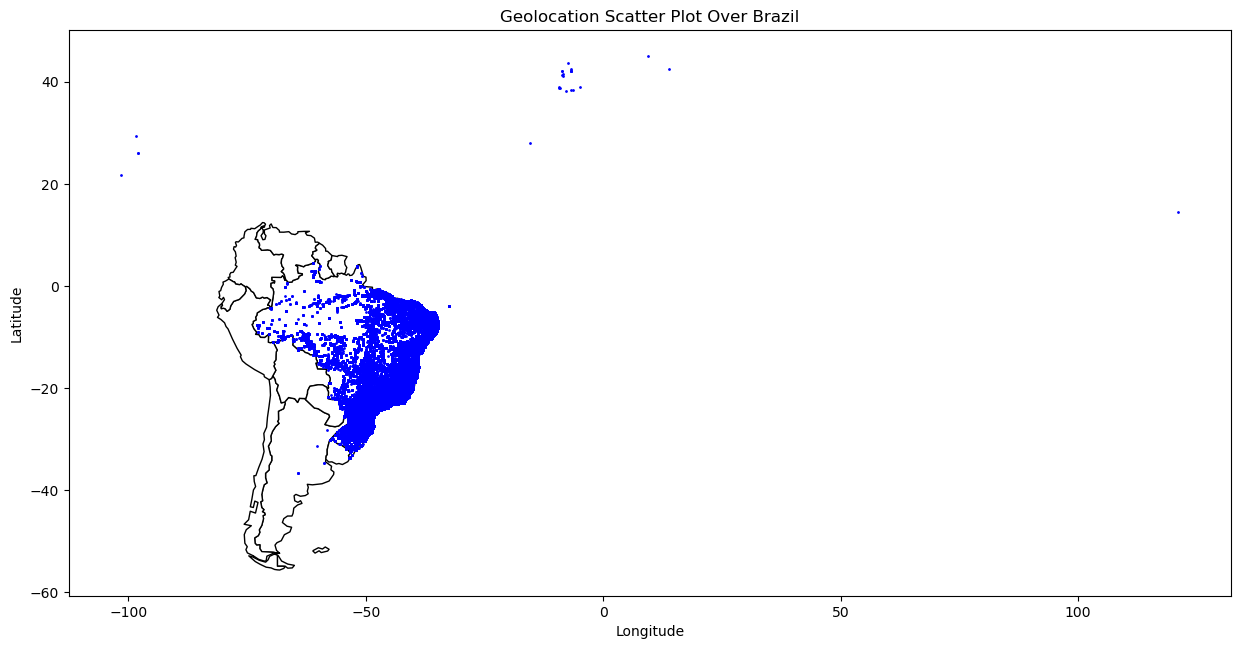

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for South America, to zoom into Brazil
ax = world[world.continent == "South America"].plot(color="white", edgecolor="black", figsize=(15, 10))

# Plot the geolocation data on top
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], s=1, c='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocation Scatter Plot Over Brazil')
plt.show()


In [38]:
# Filter based on bounding box
filtered_geolocation = geolocation[
    (geolocation['geolocation_lat'] > -33) & 
    (geolocation['geolocation_lat'] < 5) & 
    (geolocation['geolocation_lng'] > -74) & 
    (geolocation['geolocation_lng'] < -35)
]


In [39]:
removed_points = len(geolocation) - len(filtered_geolocation)
print(f"Number of points removed: {removed_points}")


Number of points removed: 11947


In [40]:
# Find indexes of rows outside the bounding box
indexes_to_remove = geolocation[
    (geolocation['geolocation_lat'] <= -33) | 
    (geolocation['geolocation_lat'] >= 5) | 
    (geolocation['geolocation_lng'] <= -74) | 
    (geolocation['geolocation_lng'] >= -35)
].index

# Drop these rows from geolocation DataFrame
geolocation.drop(indexes_to_remove, inplace=True)

In [41]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988216 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  988216 non-null  int64  
 1   geolocation_lat              988216 non-null  float64
 2   geolocation_lng              988216 non-null  float64
 3   geolocation_city             988216 non-null  object 
 4   geolocation_state            988216 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 45.2+ MB


In [42]:
geolocation.shape

(988216, 5)

In [43]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,988216.000000,988216.000000,988216.000000
mean,36359.883847,-21.331467,-46.524998
std,30661.311543,5.551105,4.097086
min,1001.000000,-32.569765,-72.930746
25%,11030.000000,-23.606481,-48.612240
50%,26061.000000,-22.927450,-46.643059
75%,64090.000000,-20.152309,-43.899099
max,99990.000000,4.482242,-35.000022


In [ ]:
# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for South America, to zoom into Brazil
ax = world[world.continent == "South America"].plot(color="white", edgecolor="black", figsize=(15, 10))

# Plot the geolocation data on top
plt.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'], s=1, c='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocation Scatter Plot Over Brazil')
plt.show()


In [ ]:
geolocation.geolocation_state.unique()

In [ ]:
geolocation.geolocation_city.unique()

In [ ]:
order_items.head()

In [ ]:
# ------- 3 order_items
print("\nOrder_items")
order_items.shape

In [ ]:
order_items.tail()

In [ ]:
order_items.dtypes

In [ ]:
order_items.isna().sum()

In [ ]:
order_items = order_items.dropna()

In [ ]:
order_items.duplicated().sum()

In [ ]:
order_items.info()

In [ ]:
order_items.describe()

In [ ]:
# Plotting the distribution of prices
order_items['price'].hist(bins=10, figsize=(10,10))
plt.title("Distribution of Order Prices")
plt.xlabel("Price")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
# box plot
plt.figure(figsize=(15,6))
plt.boxplot(order_items['price'], vert=False)  # The vert=False argument makes it horizontal
plt.title("Distribution of Order Prices")
plt.xlabel("Price")
plt.show()

In [ ]:
# Density Plot (Kernel Density Estimate)
order_items['price'].plot(kind='kde', figsize=(10,10))
plt.title("Density Plot of Order Prices")
plt.xlabel("Price")
plt.show()

In [ ]:
# violin plot
sns.violinplot(x=order_items['price'])
plt.title("Violin Plot of Order Prices")
plt.show()

In [ ]:
# ------- 4 payments
print("\nPayments")
payments.shape

In [ ]:
payments.head()

In [ ]:
payments.isna().sum()

In [ ]:
payments = payments.dropna()

In [ ]:
# calculate duplicate 
payments.duplicated().sum()

In [ ]:
# remove unused row
payments.drop('payment_sequential', axis=1, inplace=True)

In [ ]:
payments.info()

In [ ]:
payments.payment_type.unique()

In [ ]:
payments.describe()

In [ ]:
# Plotting the distribution of payment types
payments['payment_type'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Payments")
plt.show()

In [ ]:
print("\nReviews")
reviews.shape

In [ ]:
reviews.head()

In [ ]:
reviews.isna().sum()

In [ ]:
# drop the columns don't want to use
reviews.drop('review_comment_title', axis=1, inplace=True)
reviews.drop('review_comment_message', axis=1, inplace=True)

In [ ]:
reviews.duplicated().sum()

In [ ]:
reviews.info()

In [ ]:
reviews.describe()

In [ ]:
# Box plot for review_score
plt.figure(figsize=(10,6))
sns.boxplot(data=reviews, x='review_score', palette="Set2")
plt.title("Box Plot of Review Scores")
plt.show()

In [ ]:
# ------- 6 orders
print("\nOrders")
# convert the date time to dataframe timestamp
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

orders.shape

In [ ]:
orders.head()

In [ ]:
orders.dtypes

In [ ]:
orders.isna().sum()

In [ ]:
orders = orders.dropna()

In [ ]:
orders.duplicated().sum()

In [ ]:
orders.info()

In [ ]:
orders.describe()

In [ ]:
print(orders['order_status'].value_counts())

# Plotting distribution of order statuses
orders['order_status'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Distribution of Order Statuses")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()

In [ ]:
# ----- products
print("\nProduct")

# Replace the 'product_category_name' values with the English translation
products['product_category_name'].replace(translation_map, inplace=True)

products.shape

In [ ]:
products.head()

In [ ]:
products.info()

In [ ]:
# drop the useless columns 
products.drop('product_name_lenght', axis=1, inplace=True)
products.drop('product_description_lenght', axis=1, inplace=True)
products.drop('product_photos_qty', axis=1, inplace=True)

In [ ]:
products.isna().sum()

In [ ]:
# drop the null product
products = products.dropna()

In [ ]:
# check the duplicate products
products.duplicated().sum()

In [ ]:
products.product_category_name.unique()

In [ ]:
products.product_category_name.nunique()

In [ ]:
products.product_category_name.duplicated()


In [ ]:
products.info()

In [ ]:
products.describe()

In [ ]:
# Plotting distribution of product categories
# Sort product categories by count and plot
sorted_categories = products['product_category_name'].value_counts().sort_values(ascending=False)
sorted_categories.plot(kind='bar', figsize=(12,6))  # Use 'barh' for horizontal bars
plt.title("Distribution of Product Categories")
plt.ylabel("Product Category")
plt.xlabel("Number of Products")
plt.show()

In [ ]:
sorted_categories

In [ ]:
# ------- 8 sellers
print("\nSeller")
sellers.shape

In [ ]:
sellers.head()

In [ ]:
sellers.isna().sum()

In [ ]:
sellers = sellers.dropna()

In [ ]:
sellers.duplicated().sum()

In [ ]:
sellers.info()

In [ ]:
sellers.describe()

In [ ]:
# to find the distribution of sellers based on their city
sellers.groupby(['seller_city'])['seller_id'].nunique().sort_values(ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Sellers by City")
plt.ylabel("City")
plt.xlabel("Number of Sellers")

In [ ]:
# to find the distribution of sellers based on their state
sellers.groupby(['seller_state'])['seller_id'].nunique().sort_values(ascending=False)[:10].iloc[::-1].plot(kind = 'barh')
plt.title("Distribution of Sellers by State")
plt.ylabel("State")
plt.xlabel("Number of Sellers")

In [ ]:
# Export cleaned dataset
customers.to_csv('olist_customers.csv', index=False)
geolocation.to_csv('olist_geolocation.csv', index=False)
order_items.to_csv('olist_order_items.csv', index=False)
payments.to_csv('olist_payments.csv', index=False)
reviews.to_csv('olist_reviews.csv', index=False)
orders.to_csv('olist_orders.csv', index=False)
products.to_csv('olist_products.csv', index=False)
sellers.to_csv('olist_sellers.csv', index=False)


In [ ]:
# Statistical Analysis for research question: Which customers buy the same products repeatedly? 
# Objective: Customer segemention (Behavioural segmentation), Customer Purchase Behaviour Analysis

In [ ]:
# merge data to carry out the objective
df = pd.read_csv('olist_merged_dataset.csv')

In [ ]:
df.columns

In [ ]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

df['product_category'] = df.product_category_name.apply(classify_cat)

In [ ]:
# EDA after merged data
# Distribution of the number of orders per customer
order_counts = df['customer_id'].value_counts()
plt.hist(order_counts, bins=35)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Products bought more than once
repeat_purchases = df.groupby('product_category')['order_id'].nunique().sort_values(ascending=False)
top_categories = repeat_purchases.head(10)
top_categories.plot(kind='bar')
plt.title('Top Product Categories Bought More Than Once')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
# Descriptive Statistics
# Customers making repeat purchases
repeat_purchase = df.groupby(['customer_unique_id', 'product_id']).size().reset_index(name='purchase_count')
repeat_customers = repeat_purchase[repeat_purchase['purchase_count'] > 1]
repeat_customers


In [ ]:
# Group by 'customer_unique_id' and calculate the total purchase count for each customer
customer_repeat_purchase = repeat_customers.groupby('customer_unique_id')['purchase_count'].sum().reset_index(name='total_purchase_count')

# Sort the DataFrame in descending order based on the total purchase count
customer_repeat_purchase = customer_repeat_purchase.sort_values(by='total_purchase_count', ascending=False)

# Display the customers with the highest repeat purchases
top_repeat_customers = customer_repeat_purchase.head(10)  # You can adjust the number as needed
top_repeat_customers


In [ ]:
# Compute the average price for each product
avg_price_per_product = df.groupby('product_id')['price'].mean().reset_index(name='average_price')

# Compute the number of times each product was purchased by each customer
repeat_purchase = df.groupby(['customer_unique_id', 'product_id']).size().reset_index(name='purchase_count')

# Merge the datasets to correlate purchase counts with product prices
product_data = repeat_purchase.merge(avg_price_per_product, on='product_id')

product_data

In [ ]:
product_data.describe()

In [ ]:
# Hypothesis Testing
# Null Hypothesis (H0): The mean purchase count of products above the median price is the same as the mean purchase count 
#of products below the median price.
# Alternative Hypothesis (Ha): The means are different.

from scipy.stats import ttest_ind

median_price = product_data['average_price'].median()
above_median = product_data[product_data['average_price'] > median_price]['purchase_count']
below_median = product_data[product_data['average_price'] <= median_price]['purchase_count']

t_stat, p_val = ttest_ind(above_median, below_median)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')


In [ ]:
# Correlation Analysis
from scipy.stats import linregress
from scipy.stats import linregress

# Run the correlation analysis
slope, intercept, r_value, p_value, std_err = linregress(product_data['average_price'], product_data['purchase_count'])

print(f'Correlation Coefficient (r_value): {r_value}')
print(f'P-value: {p_value}')


In [ ]:
# visualisation of the statistic
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_data, x='average_price', y='purchase_count', alpha=0.5)
sns.regplot(data=product_data, x='average_price', y='purchase_count', scatter=False, color='red')  # regression line
plt.title('Correlation between Product Price and Purchase Count')
plt.xlabel('Average Price of Product')
plt.ylabel('Purchase Count')
plt.show()
